# EXPLORATORY DATA ANALYSIS ON THE WORLD'S BEST RESTAURANTS

## Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the csv dataset 

In [2]:
rest_df = pd.read_csv(r"C:\Users\vaish_s4kcn30\Downloads\WorldsBestRestaurants.csv")
rest_df.sample()

,year,rank,restaurant,location,country,lat,lng
609,2014,10,The Ledbury,London,United Kingdom,51.507218,-0.127586


### Finding the total number of unique categories under each column:

In [3]:
rest_df.nunique()

year           21
rank           50
restaurant    257
location      135
country        42
lat           131
lng           131
dtype: int64

### Finding the total number of rows and columns:

In [4]:
rest_df.shape
print(f'The total number of rows in the dataset are {rest_df.shape[0]} and the total number of columns are {rest_df.shape[1]}.')

The total number of rows in the dataset are 1050 and the total number of columns are 7.


### Checking for any null values in the dataset:

In [5]:
rest_df.isnull().sum()

year          0
rank          0
restaurant    0
location      0
country       0
lat           0
lng           0
dtype: int64

There are no empty values in this dataset.

### Checking for duplicated values in the dataset:

In [6]:
duplicates = rest_df.duplicated().sum()
print(f'The total number of duplicate values in this dataset is {duplicates}.')

The total number of duplicate values in this dataset is 0.


### Calculating the total nymber of restaurants for every year:

In [7]:
restaurants_per_year_count = rest_df['year'].value_counts().sort_index()
restaurants_per_year_count

year
2002    50
2003    50
2004    50
2005    50
2006    50
2007    50
2008    50
2009    50
2010    50
2011    50
2012    50
2013    50
2014    50
2015    50
2016    50
2017    50
2018    50
2019    50
2021    50
2022    50
2023    50
Name: count, dtype: int64

### Plotting the years vs total number of restaurants per year using the matplotlib library:

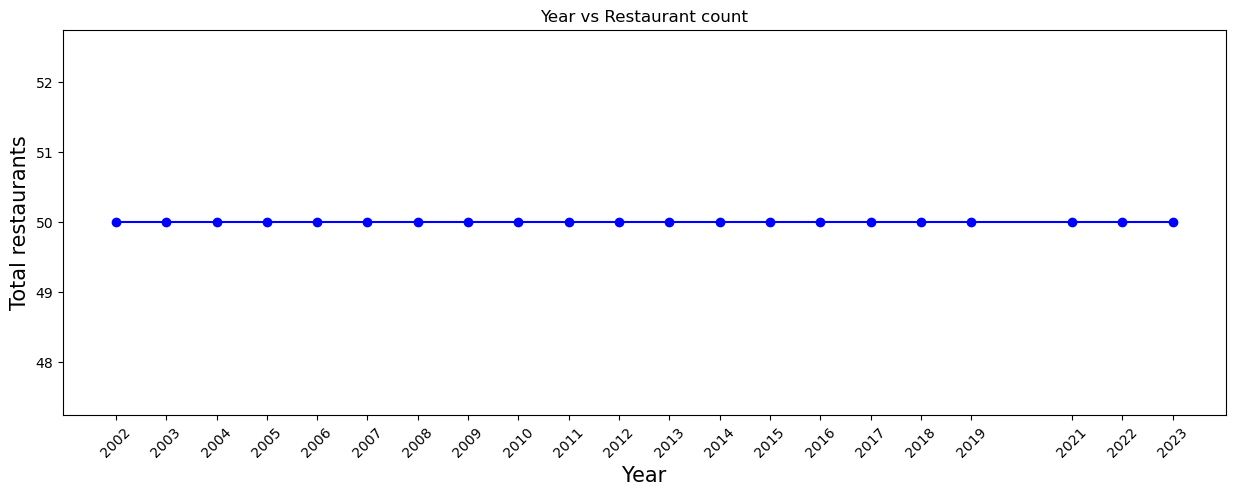

In [8]:
plt.figure(figsize=(15,5))
plt.plot(restaurants_per_year_count.index, restaurants_per_year_count.values, marker = 'o', color = 'blue')
plt.xticks(restaurants_per_year_count.index, rotation = 45, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Total restaurants', fontsize = 15)
plt.title('Year vs Restaurant count')
plt.show()

## Identifying the top 10 countries with the most number of restaurants:

In [9]:
country_count = rest_df['country'].value_counts()
top_10_countries = country_count.head(10)
print(f'The top 10 countries with the most number of restaurants are :\n {top_10_countries}')

The top 10 countries with the most number of restaurants are :
 country
United States     145
France            141
Spain             114
United Kingdom    103
Italy              84
Germany            47
Japan              34
Australia          32
Peru               29
Denmark            29
Name: count, dtype: int64


In [10]:
top_10_countries = pd.DataFrame(top_10_countries).reset_index()
top_10_countries

,country,count
0,United States,145
1,France,141
2,Spain,114
3,United Kingdom,103
4,Italy,84
5,Germany,47
6,Japan,34
7,Australia,32
8,Peru,29
9,Denmark,29


## Plotting the top 10 countries vs the number of restaurants using a bar chart: 

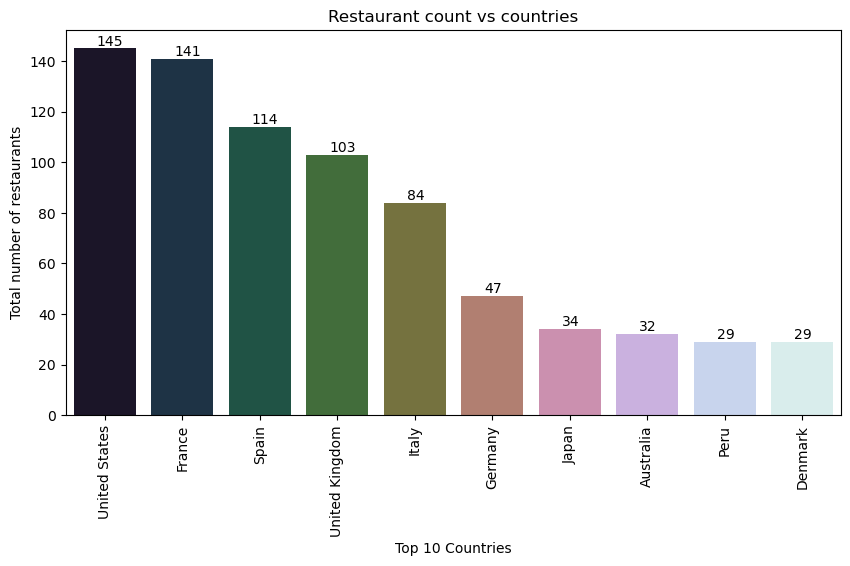

In [11]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_10_countries['country'], y=top_10_countries['count'] , palette = 'cubehelix')
plt.xlabel('Top 10 Countries')
plt.ylabel('Total number of restaurants')
plt.title('Restaurant count vs countries')
plt.xticks(top_10_countries.index, rotation = 90)
for index,value in enumerate(top_10_countries['count']):
    plt.text(index-0.1,value+1.2,top_10_countries['count'].loc[index], fontsize = 10)
plt.show()

## Identifying the average ranking on the top 10 most frequently listed restaurants:

In [12]:
Restaurant_frequency = rest_df['restaurant'].value_counts()
Top_10_rest_freq = Restaurant_frequency.sort_values(ascending = False).head(10)

In [13]:
Top_10_rest_freq

restaurant
Mugaritz                 17
Le Calandre              17
Le Bernardin             17
Arpège                   17
Arzak                    16
Steirereck               14
Asador Etxebarri         14
The French Laundry       13
El Celler de Can Roca    13
Narisawa                 13
Name: count, dtype: int64

In [14]:
average_rank = rest_df[rest_df['restaurant'].isin (Top_10_rest_freq.index)].groupby('restaurant')['rank'].mean().sort_values(ascending = False)

In [15]:
average_rank = pd.DataFrame(average_rank)
average_rank = average_rank.reset_index()
average_rank['rank']= round(average_rank['rank'],0)
average_rank

,restaurant,rank
0,Le Calandre,31.0
1,Le Bernardin,26.0
2,Arpège,22.0
3,Asador Etxebarri,21.0
4,Narisawa,20.0
5,The French Laundry,19.0
6,Arzak,16.0
7,Steirereck,16.0
8,Mugaritz,9.0
9,El Celler de Can Roca,6.0


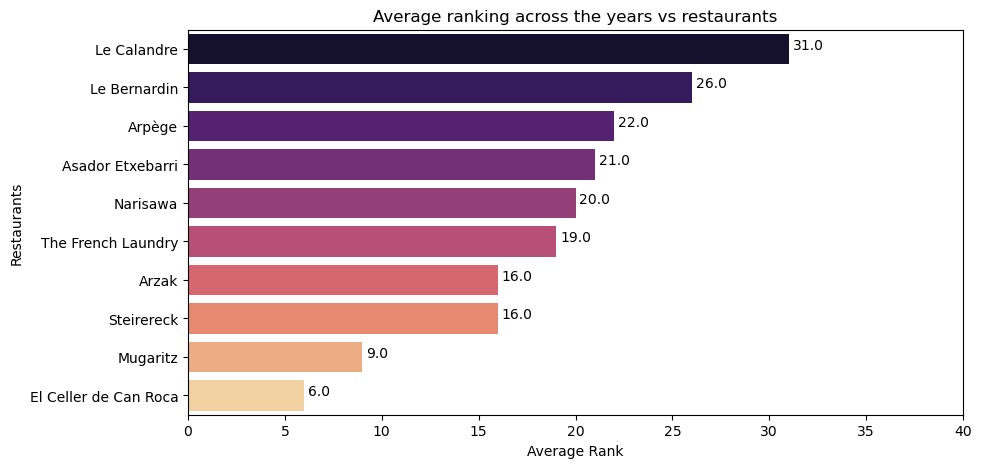

In [16]:
plt.figure(figsize = (10,5))
sns.barplot(x = average_rank['rank'], y =average_rank['restaurant'], palette = 'magma')
plt.title('Average ranking across the years vs restaurants')
plt.xlabel('Average Rank')
plt.ylabel('Restaurants')
for index,value in enumerate(average_rank['rank']):
    plt.text(value+0.2, index ,average_rank['rank'].loc[index])
    plt.xlim(0,40)
plt.show()

In [17]:
top_countries  = rest_df.groupby(['year', 'country']).size().reset_index(name = 'count')

In [18]:
top_countries_per_year = top_countries.loc[top_countries.groupby('year')['count'].idxmax()]

In [19]:
top_countries_per_year

,year,country,count
26,2002,United States,11
45,2003,United Kingdom,11
50,2004,France,13
70,2005,United Kingdom,14
77,2006,France,10
93,2007,France,12
108,2008,France,10
136,2009,United States,8
155,2010,United States,8
162,2011,France,8


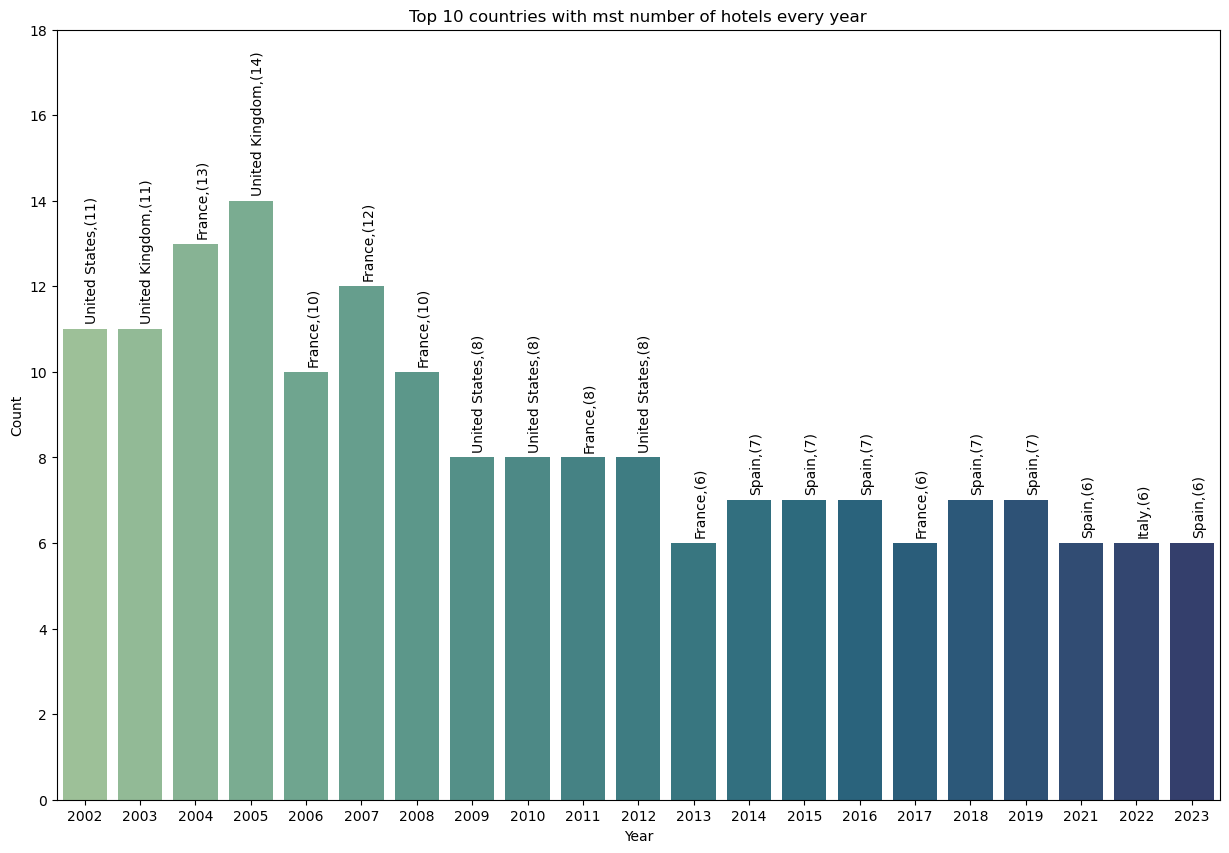

In [20]:
plt.figure(figsize = (15,10))
sns.barplot(x=top_countries_per_year['year'],y=top_countries_per_year['count'],palette = 'crest')
plt.title('Top 10 countries with mst number of hotels every year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.ylim(0,18)
for index,value in enumerate(top_countries_per_year['count']):
    plt.text(index, value + 0.2, f"{top_countries_per_year['country'].iloc[index]},({top_countries_per_year['count'].iloc[index]})", rotation = 90, fontsize = 10)
plt.show()

## Identifying the most improved and the most declined restaurant rankings:

In [21]:
rest_rank_df = rest_df.groupby('restaurant')['rank'].agg(['first','last']).reset_index()
rest_rank_df['rank_change'] = rest_rank_df['first']-rest_rank_df['last']

In [22]:
rest_rank_df

,restaurant,first,last,rank_change
0,1884,7,45,-38
1,8 1/2 Otto e Mezzo Bombana,39,39,0
2,A Casa do Porco,39,12,27
3,Al Mahara,17,31,-14
4,Alain Ducasse,17,15,2
...,...,...,...,...
252,WD~50,34,45,-11
253,Waku Ghin,39,50,-11
254,White Rabbit,23,25,-2
255,Wolfgat,50,50,0


In [23]:
top_5_most_improved_rest = rest_rank_df.sort_values('rank_change',ascending=False).head(5)
top_5_most_improved_rest

,restaurant,first,last,rank_change
39,Central,50,2,48
87,Geranium,49,1,48
72,Eleven Madison Park,50,4,46
14,Asador Etxebarri,44,4,40
142,Maido,44,6,38


In [24]:
top_5_most_declined_rest = rest_rank_df.sort_values('rank_change').head(5)
top_5_most_declined_rest

,restaurant,first,last,rank_change
225,The French Laundry,3,50,-47
195,Rockpool,4,49,-45
224,The Fat Duck,2,47,-45
50,Comme Chez Soi,7,49,-42
129,Le Louis XV,3,43,-40


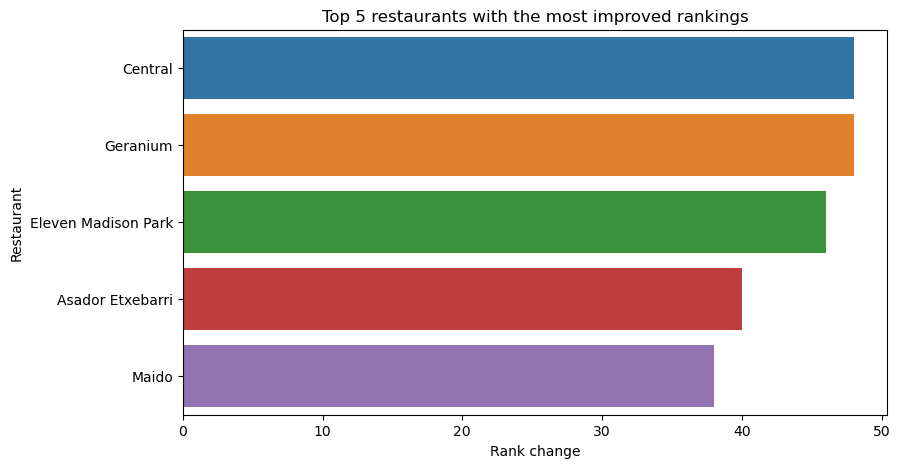

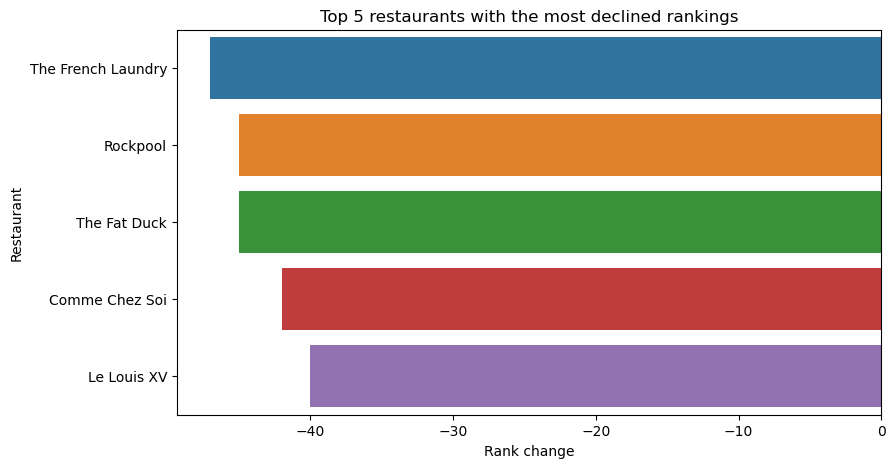

In [25]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
sns.barplot(y = top_5_most_improved_rest['restaurant'], x =top_5_most_improved_rest['rank_change'])
plt.title('Top 5 restaurants with the most improved rankings')
plt.xlabel ('Rank change')
plt.ylabel('Restaurant')
plt.show()

plt.figure(figsize = (20,5))
plt.subplot(1,2,2)
sns.barplot(y = top_5_most_declined_rest['restaurant'], x =top_5_most_declined_rest['rank_change'])
plt.title('Top 5 restaurants with the most declined rankings')
plt.xlabel ('Rank change')
plt.ylabel('Restaurant')
plt.show()

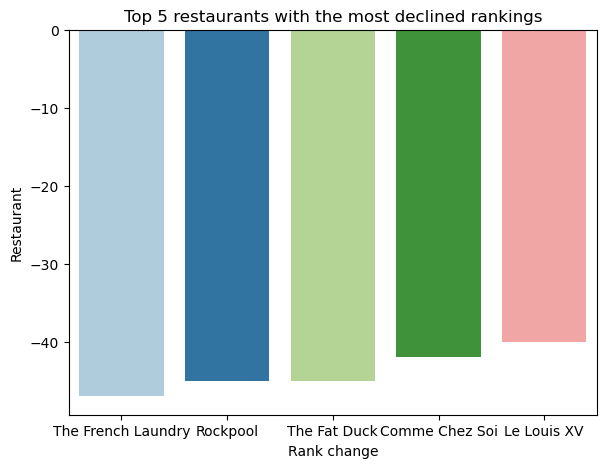

In [26]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,2)
sns.barplot(x = top_5_most_declined_rest['restaurant'], y =top_5_most_declined_rest['rank_change'], palette = 'Paired')
plt.title('Top 5 restaurants with the most declined rankings')
plt.xlabel ('Rank change')
plt.ylabel('Restaurant')
plt.show()

### Identifying the top 10 locations with the maximum number of restaurants:

In [27]:
rest_loc_df = rest_df.groupby(['location','country']).size().reset_index(name = 'Restaurant count')
rest_loc_df.sample()

,location,country,Restaurant count
38,Dénia,Spain,2


In [28]:
top_10_rest_loc = rest_loc_df.sort_values(by ='Restaurant count', ascending=False).head(10)
top_10_rest_loc

,location,country,Restaurant count
96,Paris,France,103
68,London,United Kingdom,85
89,New York,United States,80
124,Tokyo,Japan,33
110,San Sebastian,Spain,31
66,Lima,Peru,29
30,Copenhagen,Denmark,29
77,Mexico City,Mexico,27
121,Sydney,Australia,21
29,Chicago,United States,20


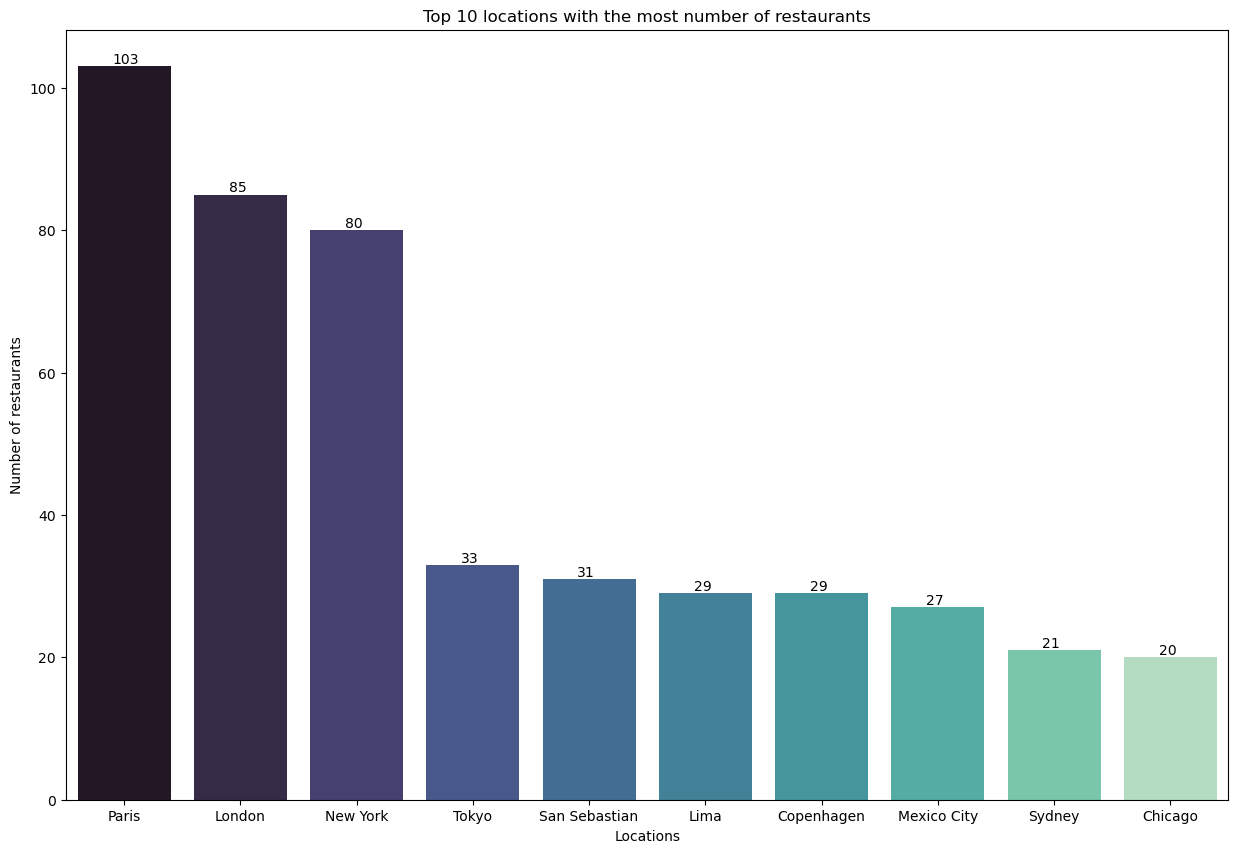

In [29]:
plt.figure(figsize=(15,10))
sns.barplot(y=top_10_rest_loc['Restaurant count'], x=top_10_rest_loc['location'], palette = 'mako')
plt.title('Top 10 locations with the most number of restaurants')
plt.ylabel('Number of restaurants')
plt.xlabel('Locations')
for index,value in enumerate(top_10_rest_loc['Restaurant count']):
    plt.text(index-0.1, value + 0.4, top_10_rest_loc['Restaurant count'].iloc[index])
plt.show()

## Identifying the changes in ranks of the top 10 restaurants over the years:

In [30]:
Top_restaurants = rest_df['restaurant'].value_counts()
Top_10_restaurants = Top_restaurants.head(10).index
Top_10_restaurants

Index(['Mugaritz', 'Arpège', 'Le Calandre', 'Le Bernardin', 'Arzak',
       'Steirereck', 'Asador Etxebarri', 'The French Laundry',
       'El Celler de Can Roca', 'Narisawa'],
      dtype='object', name='restaurant')

In [31]:
Top_Restaurants_data = rest_df[rest_df['restaurant'].isin(Top_10_restaurants)]
Top_Restaurants_data['restaurant'].nunique()

10

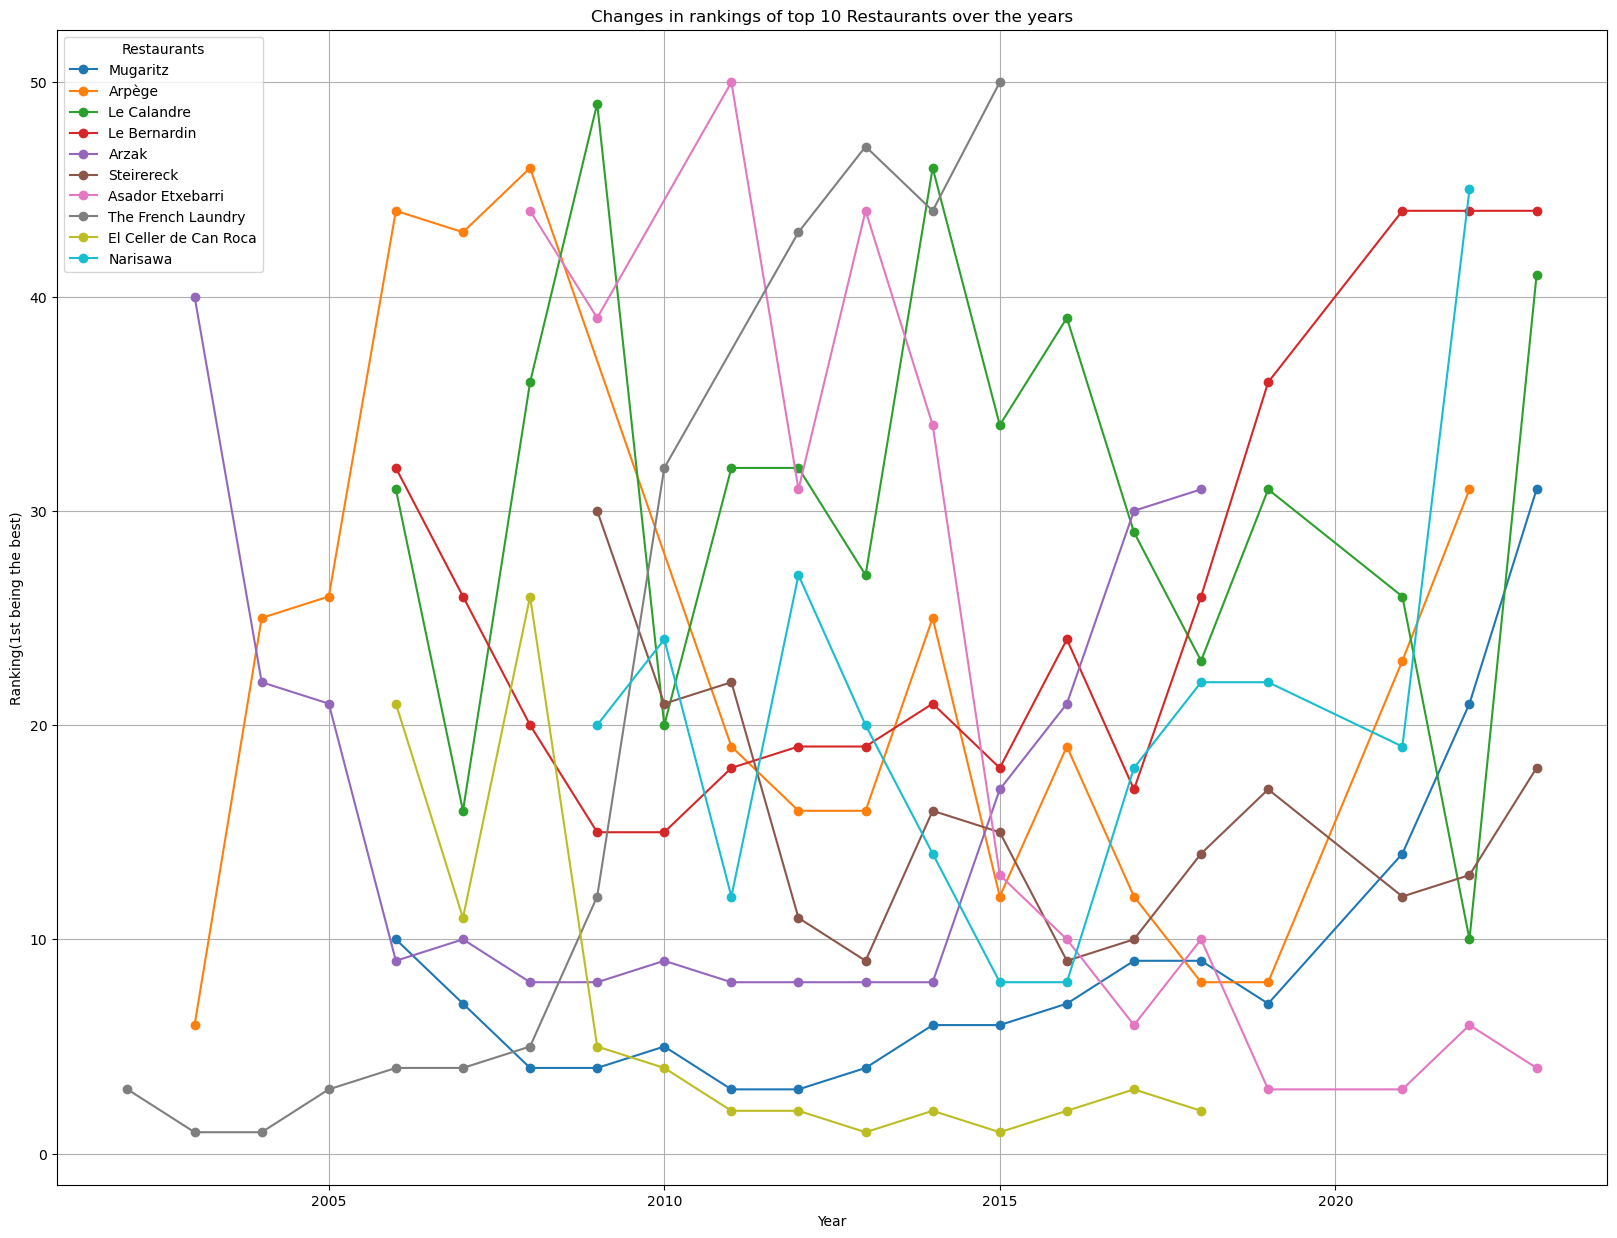

In [32]:
plt.figure(figsize = (20,15))  
for rest in Top_10_restaurants:
    rest_subset = Top_Restaurants_data[Top_Restaurants_data['restaurant']==rest]
    plt.plot(rest_subset['year'],rest_subset['rank'], marker = 'o')
    
plt.title('Changes in rankings of top 10 Restaurants over the years')
plt.xlabel('Year')
plt.ylabel('Ranking(1st being the best)')
plt.legend(Top_10_restaurants, title='Restaurants')
plt.grid(True)
plt.show()

### Identifying the top 10 countries with the best average ranking across all the years:

In [33]:
country_avg_rank = rest_df.groupby('country')['rank'].mean().reset_index(name = 'Average rank') 
country_avg_rank['Average rank']= round(country_avg_rank['Average rank'],0)
country_avg_rank
top_10_country_avg_rank = country_avg_rank.sort_values('Average rank').head(10)
top_10_country_avg_rank

,country,Average rank
23,Mauritius,5.0
11,Estonia,15.0
2,Austria,16.0
34,Spain,17.0
25,Monaco,17.0
10,Denmark,17.0
28,Peru,18.0
5,Brazil,24.0
30,Russia,24.0
24,Mexico,24.0


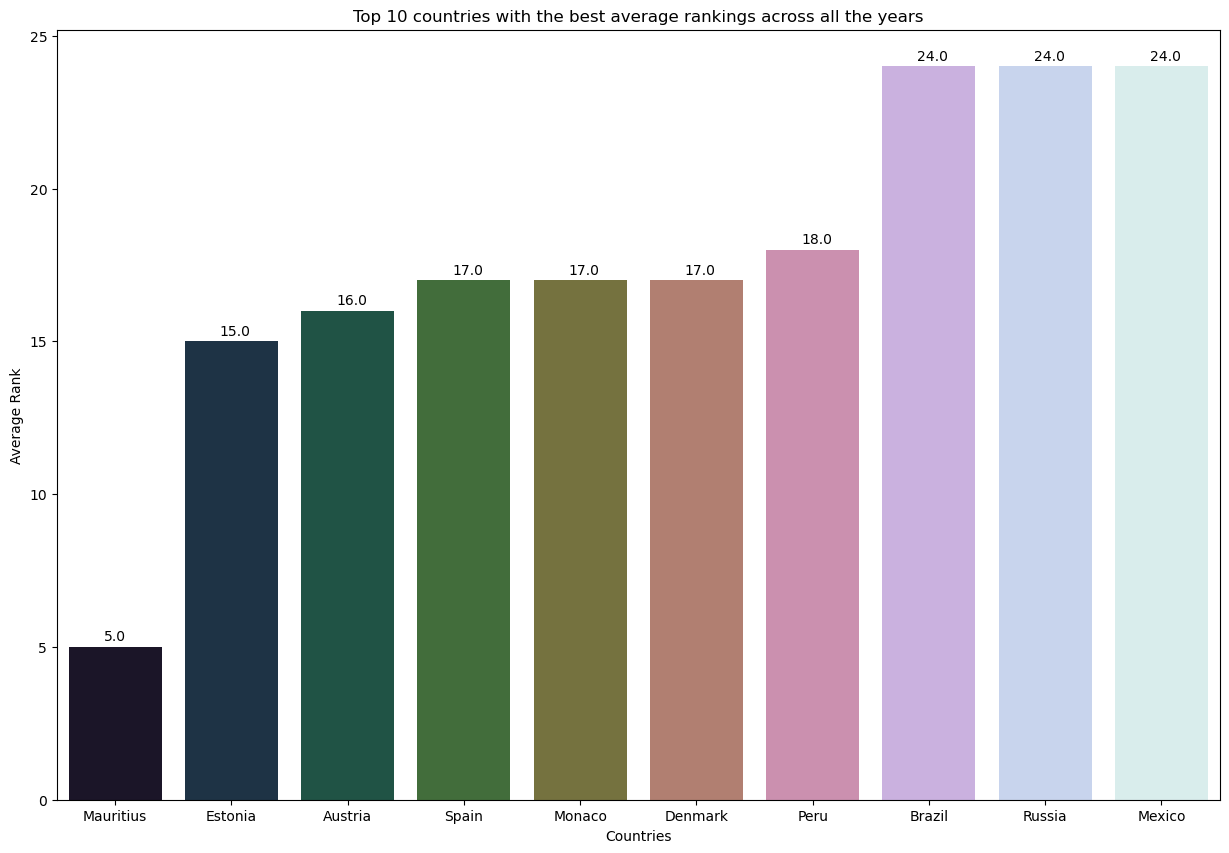

In [34]:
plt.figure(figsize = (15,10))
sns.barplot(y = top_10_country_avg_rank['Average rank'], x = top_10_country_avg_rank['country'], palette = 'cubehelix')
plt.title('Top 10 countries with the best average rankings across all the years')
plt.ylabel('Average Rank')
plt.xlabel('Countries')
for index,value in enumerate(top_10_country_avg_rank['Average rank']):
    plt.text(index-0.1, value + 0.2, top_10_country_avg_rank['Average rank'].iloc[index])
plt.show()